<a href="https://colab.research.google.com/github/Jiyuunji/Data_Science_Spring_2025/blob/main/U24105938_Activity3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

/home/unknown/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [ ]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [ ]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [ ]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

/tmp/ipykernel_6459/2270405838.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [ ]:
#merged_data.dtypes

In [ ]:
pollution_data = merged_data[['pm10','neighborhood']]

In [ ]:
pollution_data.shape[0]

118495

In [ ]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [ ]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [ ]:
pollution_data['pm10'].max()

87341.710000000006

what is the maximum pm10 value

In [ ]:
pollution_data['pm10'].min()

0.0

In [ ]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [ ]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [ ]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [ ]:
joined_table = joined_table.where('pm10', are.below(300))

In [ ]:
len(joined_table)

2

In [ ]:
joined_table.num_rows

117356

In [ ]:
# Sampling 10% of rows from the table
sampled_rows = joined_table.sample(int(0.10 * joined_table.num_rows), with_replacement=False)

In [ ]:
sampled_rows

pm10,neighborhood
1.1,Bronx Park
4.62,Bronx Park
0.05,Bronx Park
2.96,Hunts Point
22.54,Bronx Park
39.67,Longwood
0.77,Longwood
0.13,Bronx Park
22.22,Longwood
0.46,Van Nest


In [ ]:
# Computing the mean pm10 for the sample
sample_mean_pm10 = np.mean(sampled_rows.column('pm10'))
sample_mean_pm10

15.746624627183641

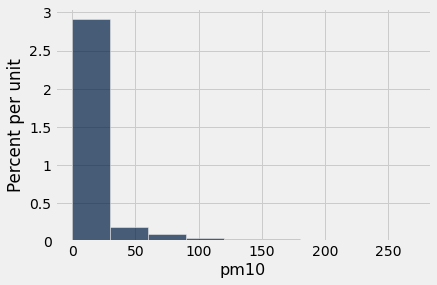

In [ ]:
# Creating an empirical histogram of the sampled data using 10 bins
sampled_rows.select('pm10').hist(bins=np.arange(0, 300, 300/10))

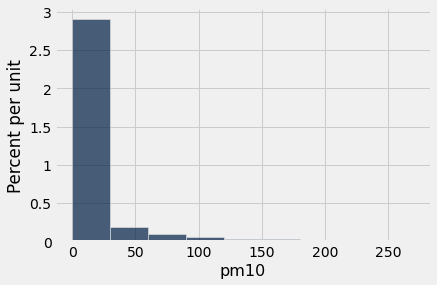

In [ ]:
# Population histogram of pm10 values
joined_table.select('pm10').hist(bins=np.arange(0, 300, 300/10))

In [ ]:
# COMMENT
# The distribution of the empirical histogram is highly skewed to the left, and it shows that most pm10 values are between 0 to 25
# In comparison to the population histogram of pm10 values, the empirical histogram looks very similar, which indicates that it represents
# the mean pm10 distribution from the population very well, which is supported
# by the law of averages

## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

In [ ]:
# Defining a function that will get one sample from the population
# Default function values mean that the sampling will be the same size as the original sample size
# Using sampled_rows to bootstrap from

def one_pm10_median():
  one_sample = sampled_rows.sample()
  return percentile(50, one_sample.column('pm10'))


In [ ]:
# Generating 5000 bootstrap samples
bootstrap_medians_pm10 = make_array()
for i in np.arange(5000):
  bootstrap_medians_pm10 = np.append(bootstrap_medians_pm10, one_pm10_median())

In [ ]:
# Constructing a 95% confidence interval
left = percentile(2.5, bootstrap_medians_pm10)
right = percentile(97.5, bootstrap_medians_pm10)
print(left, ' ', right)

2.96   3.17


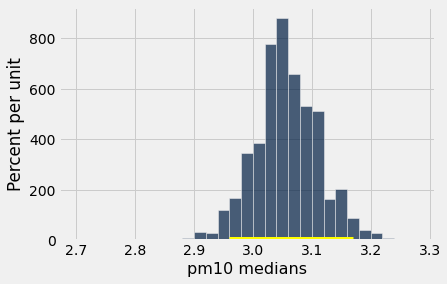

In [ ]:
# Visualizing results as an empirical histogram with confidence intervals
bootstrap_medians_pm10_table = Table().with_column('pm10 medians', bootstrap_medians_pm10)
bootstrap_medians_pm10_table.hist(bins=np.arange(2.7, 3.3, 0.02))
plt.plot([left, right], [0, 0], color='yellow', lw=7, zorder=1)# Generating 5000 bootstrap samples

In [ ]:
# COMMENT
# Based on the computed confidence interval, it can be inferred that
# the median pm10 is estimated to be between 2.96 and 3.17 with a confidence level of 95%
# that is, we are sure that the median will be in this interval 95% of the time

## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

In [ ]:
np.mean(joined_table.column('pm10'))

16.172319779133577

In [ ]:
# Defining a function that calculates one pm10 mean
# using sampled_rows as the original sample to bootstrap from
def one_pm10_mean():
    resample = sampled_rows.sample()
    return np.mean(resample.column('pm10'))


In [ ]:
# Generating 5000 bootstrap samples
bootstrap_means_pm10 = make_array()
for i in np.arange(5000):
  bootstrap_means_pm10 = np.append(bootstrap_means_pm10, one_pm10_mean())

In [ ]:
# Constructing a 95% confidence interval
left_mean = percentile(2.5, bootstrap_means_pm10)
right_mean = percentile(97.5, bootstrap_means_pm10)
print(left_mean, ' ', right_mean)

15.1096446527   16.3697631018


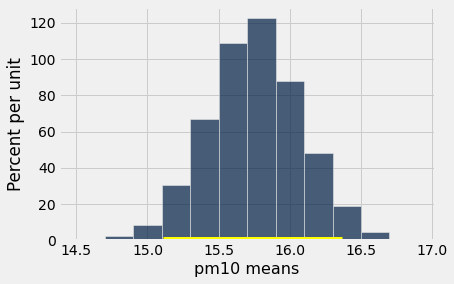

In [ ]:
# Visualizing results as an empirical histogram with confidence intervals
bootstrap_means_pm10_table = Table().with_column('pm10 means', bootstrap_means_pm10)
bootstrap_means_pm10_table.hist(bins=np.arange(14.5, 17, 0.2))
plt.plot([left_mean, right_mean], [0, 0], color='yellow', lw=7, zorder=1)

In [ ]:
# RESULT INTERPRETATION
# According to the graph of pm10 means and the 95% confidence interval,
# the mean pm10 value lies in the interval of 15.1 to 16.3 with a confidence
# level of 95%.
# The null hypothesis suggests that pm10 mean value is 20, but according
# to the interpreation, there is a significant difference between the
# mean pm10 under the null hypothesis and the 95% confidence interval
# therefore, the null hypothesis is rejected

## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


In [ ]:
# Compute mean pm10 for each neighborhood
means_table = sampled_rows.group('neighborhood', np.mean)
means_table

neighborhood,pm10 mean
Astoria,9.95481
Belmont,18.0775
Bronx Park,13.5115
Bronxdale,11.4071
Civic Center,8.48137
Claremont Village,7.48625
Concourse,14.8253
Concourse Village,25.4333
Country Club,17.0025
Crotona Park,44.9943


In [ ]:
top3 = means_table.sort('pm10 mean', descending=True).take(np.arange(3))
top3_neighborhoods = top3.column('neighborhood')
top3

neighborhood,pm10 mean
Crotona Park,44.9943
Concourse Village,25.4333
Morris Park,22.6767


In [ ]:
def bootstrap_means(neighborhood_name):
    subset = sampled_rows.where('neighborhood', neighborhood_name)
    means = []
    for i in range(5000):
        sample = subset.sample()
        means.append(np.mean(sample.column('pm10')))
    return np.array(means)

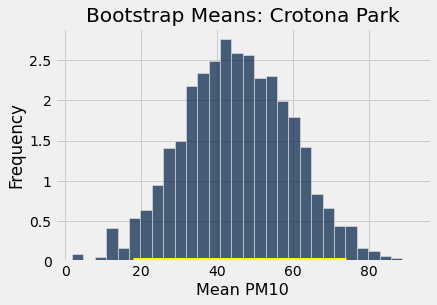

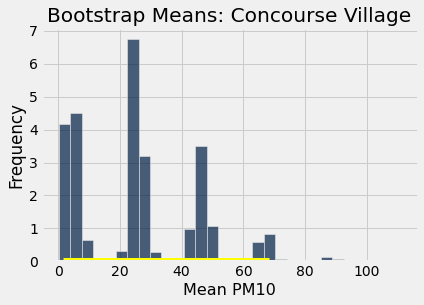

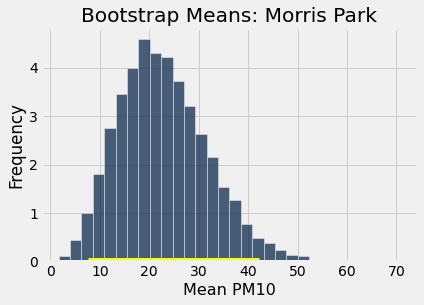

In [ ]:
for i in np.arange(3):
    neighborhood = top3_neighborhoods.item(i)
    boot_means = bootstrap_means(neighborhood)

    mean_neighbourhood_left = percentile(2.5, boot_means)
    mean_neighbourhood_right = percentile(97.5, boot_means, )

    # Create a temporary Table for plotting
    boot_means_table = Table().with_column('Bootstrap Means', boot_means)

    # Subplot
    boot_means_table.hist('Bootstrap Means', bins=30)
    plt.plot([mean_neighbourhood_left, mean_neighbourhood_right], [0, 0], color='yellow', lw=7, zorder=1)
    plt.title(f'Bootstrap Means: {neighborhood}')
    plt.xlabel('Mean PM10')
    plt.ylabel('Frequency')

plt.show()

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.